In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

In [ ]:
df = pd.read_csv('/content/taxi_tripdata.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [ ]:
df.shape

(83691, 20)

In [ ]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


In [ ]:
df.dtypes

VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [ ]:
df = df.drop(['ehail_fee', 'VendorID', 'trip_type', 'congestion_surcharge'], axis= 1)

In [ ]:
len(df[df['total_amount'] <= 0])

394

In [ ]:
df = df[df['total_amount'] > 0]

In [ ]:
len(df[df['fare_amount'] <= 0])

50

In [ ]:
len(df[df['trip_distance'] <= 0])

3263

In [ ]:
df.groupby('RatecodeID')['trip_distance'].median()

RatecodeID
1.0     2.00
2.0    17.32
3.0     0.11
4.0    11.90
5.0     1.27
Name: trip_distance, dtype: float64

In [ ]:
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 1.0)] = 2.8
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 2.0)] = 20
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 3.0)] = 24
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 4.0)] = 12
df.loc[(df['trip_distance'] <= 0) & (df['RatecodeID'] == 5.0)] = 3.1

In [ ]:
for i in df.columns[[0, 1]]:
    df[i] = pd.to_datetime(df[i])

In [ ]:
timedeltas = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
trip_duration = []
for i in timedeltas :
    trip_duration.append(i.total_seconds() / 60)

df['trip_duration'] = trip_duration
df['trip_duration'] = df['trip_duration'].round(2)

In [ ]:
df = df[df['trip_duration'] > 1]
df.shape

(80019, 17)

In [ ]:
df['store_and_fwd_flag'].value_counts()

N    47437
Y      127
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df['store_and_fwd_flag'].fillna('N', inplace= True)

In [ ]:
df['payment_type'].value_counts(normalize= True)

1.0    0.583445
2.0    0.413611
3.0    0.002565
4.0    0.000357
5.0    0.000021
Name: payment_type, dtype: float64

In [ ]:
df.loc[(df['payment_type'].isna()) & (df['total_amount'] > 50), 'payment_type'] = 1.0
df.loc[(df['payment_type'].isna()) & (df['total_amount'] <= 50), 'payment_type'] = 2.0

In [ ]:
df.loc[(df['RatecodeID'].isna()) & (df['total_amount'] >= 184), 'RatecodeID'] = 4.0
df.loc[(df['RatecodeID'].isna()) & (138 <= df['total_amount']) & (df['total_amount']< 184), 'RatecodeID'] = 3.0
df.loc[(df['RatecodeID'].isna()) & (79 <= df['total_amount']) & (df['total_amount']< 138), 'RatecodeID'] = 2.0
df.loc[(df['RatecodeID'].isna()) & (0 <= df['total_amount']) & (df['total_amount']< 79), 'RatecodeID'] = 1.0

In [ ]:
df.loc[df['passenger_count']==0, 'passenger_count'] = 1.0
df.loc[df['passenger_count']==7, 'passenger_count'] = 1.0
df.loc[df['passenger_count']==32, 'passenger_count'] = 1.0

In [ ]:
df.loc[df['passenger_count'].isna(), 'passenger_count'] = 1.0

In [ ]:
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_duration            0
dtype: int64

In [ ]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_duration
0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74.0,168.0,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,4.73
1,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116.0,265.0,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,35.92
2,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97.0,33.0,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,6.03
3,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74.0,42.0,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,5.72
4,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42.0,244.0,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,7.23


In [ ]:
df.shape

(80019, 17)

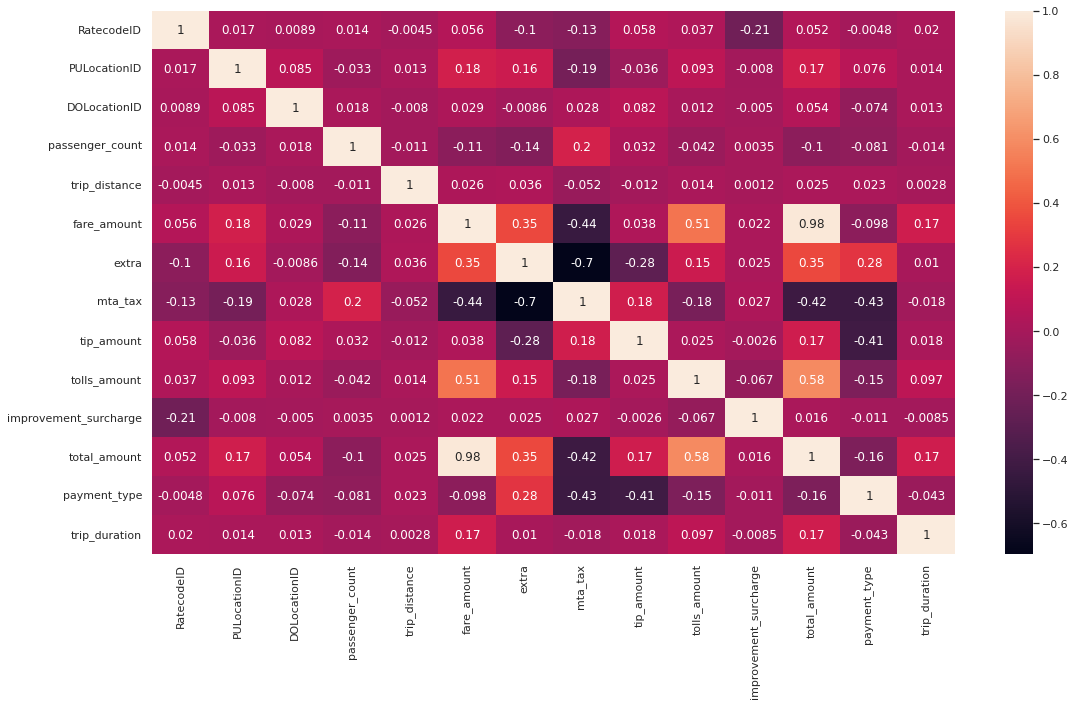

In [ ]:
plt.figure(figsize= (18, 10))
sns.heatmap(df.corr(), annot= True);



##### Busiest day

In [ ]:
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

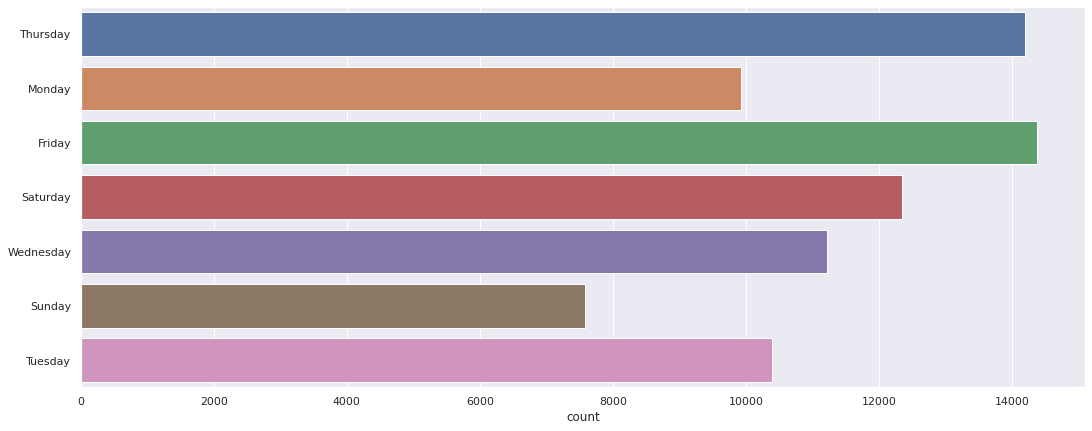

In [ ]:
plt.figure(figsize= (18, 7))
sns.countplot(y= 'day_of_week', data= df)
plt.ylabel('');

##### Busiest hour

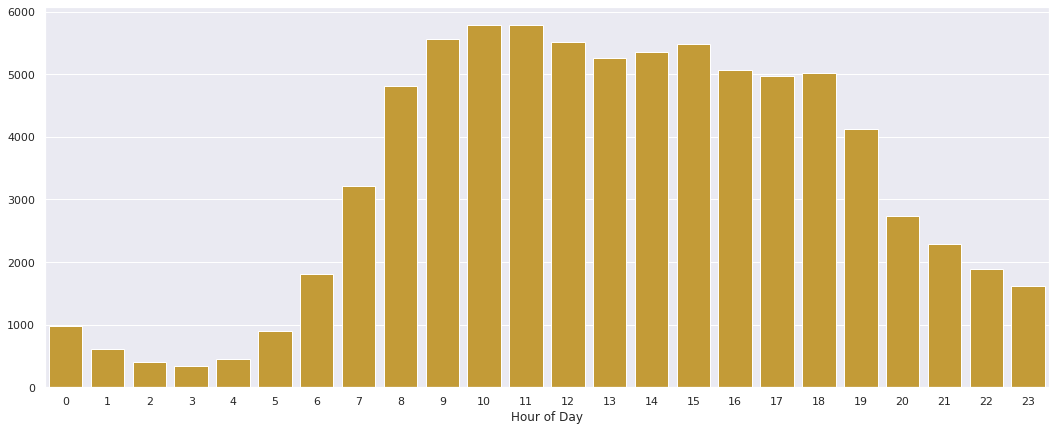

In [ ]:
plt.figure(figsize= (18, 7))
sns.countplot(x= df['lpep_pickup_datetime'].dt.hour, data= df, color= 'goldenrod')
plt.ylabel('')
plt.xlabel('Hour of Day');

Mean Absolute Error: 12.438234676761228
Root Mean Squared Error: 16.798338319669405
Mean squared error: 282.1841703020735
R2 Score: 0.03388619398775883


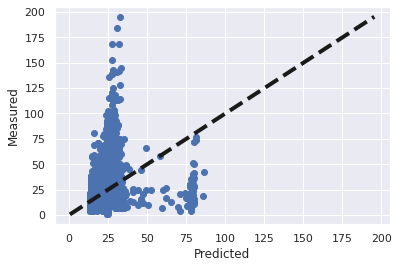

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['trip_distance', 'passenger_count', 'RatecodeID', 'trip_duration']]
y = df['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
plt.plot(y_pred, y_test, 'o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw= 4)
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.show()



Mean Absolute Error: 3.9038876298317717
Root Mean Squared Error: 6.327348573688748
Mean squared error: 40.035339972961026
R2 Score: 0.8629310260924046


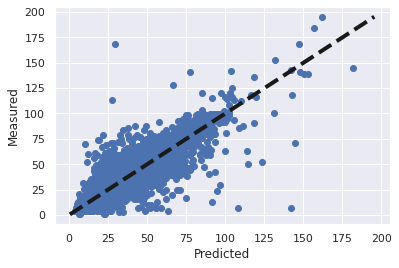

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, random_state= 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
plt.plot(y_pred, y_test, 'o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw= 4)
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.show()


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


Learning rate set to 0.5
0:	learn: 11.2112927	total: 56.2ms	remaining: 5.56s
1:	learn: 8.6075832	total: 63.5ms	remaining: 3.11s
2:	learn: 7.5973921	total: 70.8ms	remaining: 2.29s
3:	learn: 7.2113749	total: 77.7ms	remaining: 1.86s
4:	learn: 7.0045569	total: 83.9ms	remaining: 1.59s
5:	learn: 6.9151313	total: 90.4ms	remaining: 1.42s
6:	learn: 6.8144042	total: 97ms	remaining: 1.29s
7:	learn: 6.7621467	total: 104ms	remaining: 1.2s
8:	learn: 6.7000342	total: 110ms	remaining: 1.11s
9:	learn: 6.6613402	total: 118ms	remaining: 1.06s
10:	learn: 6.5783677	total: 125ms	remaining: 1.01s
11:	learn: 6.5189310	total: 131ms	remaining: 962ms
12:	learn: 6.4874527	total: 138ms	remaining: 923ms
13:	learn: 6.4529155	total: 144ms	remaining: 887ms
14:	learn: 6.4239502	total: 151ms	remaining: 855ms
15:	learn: 6.3589615	total: 158ms	remaining: 827ms
16:	learn: 6.3195425	total: 163ms	remaining: 796ms
17:	learn: 6.2828026	total: 169ms	remaining: 770ms
18:	learn: 6.2267375	total: 176ms	remaining: 749ms
19:	learn: 

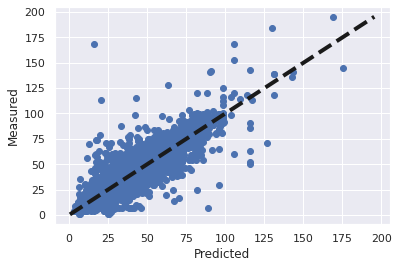

In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(n_estimators= 100, random_state= 42)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
plt.plot(y_pred, y_test, 'o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw= 4)
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.show()


Mean Absolute Error: 4.002779971673748
Root Mean Squared Error: 6.631038009572526
Mean squared error: 43.97066508439557
R2 Score: 0.8494576554308482


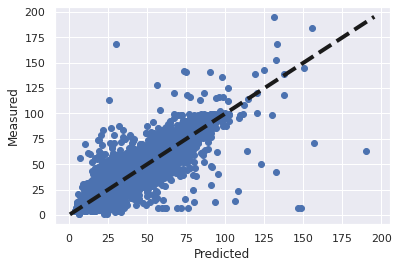

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
plt.plot(y_pred, y_test, 'o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw= 4)
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.show()



Mean Absolute Error: 4.749224693772213
Root Mean Squared Error: 8.082670957507466
Mean squared error: 65.32956980733464
R2 Score: 0.7763311837650495


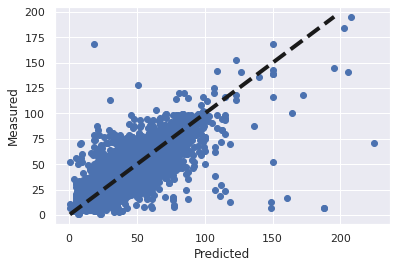

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
import matplotlib.pyplot as plt

plt.plot(y_pred, y_test, 'o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw= 4)
plt.xlabel('Predicted')
plt.ylabel('Measured')
plt.show()
